#
What is the percentage of games wins by each player based on selection | White x Black ? 

What is the impact of rating difference on winner rate? 

Is there a correlation between openings and victory status?

Rating impact on victory status, 

Comparison of the prediction of the winner in a chess game with different models

Discover the data / chess | Uncover the insights



In [1]:
# Basic Libraries
import pandas as pd
import numpy as np
# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import BASE_COLORS
%matplotlib inline
## sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor



In [2]:
chess = pd.read_csv('chess_games.csv')
display(chess.shape)
chess.head(3)

(20058, 17)

,game_id,rated,turns,victory_status,winner,time_increment,white_id,white_rating,black_id,black_rating,moves,opening_code,opening_moves,opening_fullname,opening_shortname,opening_response,opening_variation
0,1,False,13,Out of Time,White,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,5,Slav Defense: Exchange Variation,Slav Defense,NaN,Exchange Variation
1,2,True,16,Resign,Black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,4,Nimzowitsch Defense: Kennedy Variation,Nimzowitsch Defense,NaN,Kennedy Variation
2,3,True,61,Mate,White,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,3,King's Pawn Game: Leonardis Variation,King's Pawn Game,NaN,Leonardis Variation


In [3]:
chess.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   game_id            20058 non-null  int64 
 1   rated              20058 non-null  bool  
 2   turns              20058 non-null  int64 
 3   victory_status     20058 non-null  object
 4   winner             20058 non-null  object
 5   time_increment     20058 non-null  object
 6   white_id           20058 non-null  object
 7   white_rating       20058 non-null  int64 
 8   black_id           20058 non-null  object
 9   black_rating       20058 non-null  int64 
 10  moves              20058 non-null  object
 11  opening_code       20058 non-null  object
 12  opening_moves      20058 non-null  int64 
 13  opening_fullname   20058 non-null  object
 14  opening_shortname  20058 non-null  object
 15  opening_response   1207 non-null   object
 16  opening_variation  14398 non-null  objec

In [56]:
chess.columns

Index(['game_id', 'rated', 'turns', 'victory_status', 'winner',
       'time_increment', 'white_id', 'white_rating', 'black_id',
       'black_rating', 'moves', 'opening_code', 'opening_moves',
       'opening_fullname', 'opening_shortname', 'opening_response',
       'opening_variation', 'rating_gap', 'white_victory'],
      dtype='object')

In [4]:
# percentage of nulls in each column
chess.isnull().mean()*100

game_id               0.000000
rated                 0.000000
turns                 0.000000
victory_status        0.000000
winner                0.000000
time_increment        0.000000
white_id              0.000000
white_rating          0.000000
black_id              0.000000
black_rating          0.000000
moves                 0.000000
opening_code          0.000000
opening_moves         0.000000
opening_fullname      0.000000
opening_shortname     0.000000
opening_response     93.982451
opening_variation    28.218167
dtype: float64

In [5]:
chess.describe().T

,count,mean,std,min,25%,50%,75%,max
game_id,20058.0,10029.500000,5790.390185,1.0,5015.25,10029.5,15043.75,20058.0
turns,20058.0,60.465999,33.570585,1.0,37.00,55.0,79.00,349.0
white_rating,20058.0,1596.631868,291.253376,784.0,1398.00,1567.0,1793.00,2700.0
black_rating,20058.0,1588.831987,291.036126,789.0,1391.00,1562.0,1784.00,2723.0
opening_moves,20058.0,4.816981,2.797152,1.0,3.00,4.0,6.00,28.0


In [6]:
chess["rated"].describe()

count     20058
unique        2
top        True
freq      16155
Name: rated, dtype: object

In [7]:
chess['rated'].value_counts() 

rated
True     16155
False     3903
Name: count, dtype: int64

In [8]:
chess['victory_status'].value_counts() 

victory_status
Resign         11147
Mate            6325
Out of Time     1680
Draw             906
Name: count, dtype: int64

In [9]:
chess['winner'].value_counts()  

winner
White    10001
Black     9107
Draw       950
Name: count, dtype: int64

In [58]:
chess['opening_variation'].value_counts()

opening_variation
#2                         797
Exchange Variation         444
Classical Variation        419
Normal Variation           377
Advance Variation          301
                          ... 
Taimanov Variation           1
Been-Koomen Variation        1
Philidor Gambit              1
Romanishin Variation #2      1
Slav                         1
Name: count, Length: 615, dtype: int64

In [10]:
chess['black_rating'].mean

<bound method Series.mean of 0        1191
1        1261
2        1500
3        1454
4        1469
         ... 
20053    1220
20054    1196
20055    1286
20056    1227
20057    1339
Name: black_rating, Length: 20058, dtype: int64>

In [11]:
chess['white_rating'].mean

<bound method Series.mean of 0        1500
1        1322
2        1496
3        1439
4        1523
         ... 
20053    1691
20054    1233
20055    1219
20056    1360
20057    1235
Name: white_rating, Length: 20058, dtype: int64>

In [12]:
#Add new column the "rating_gap" between the two players
chess['rating_gap'] = abs(chess['white_rating'] - chess['black_rating'])
chess['rating_gap'].head

<bound method NDFrame.head of 0        309
1         61
2          4
3         15
4         54
        ... 
20053    471
20054     37
20055     67
20056    133
20057    104
Name: rating_gap, Length: 20058, dtype: int64>

In [13]:
chess.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   game_id            20058 non-null  int64 
 1   rated              20058 non-null  bool  
 2   turns              20058 non-null  int64 
 3   victory_status     20058 non-null  object
 4   winner             20058 non-null  object
 5   time_increment     20058 non-null  object
 6   white_id           20058 non-null  object
 7   white_rating       20058 non-null  int64 
 8   black_id           20058 non-null  object
 9   black_rating       20058 non-null  int64 
 10  moves              20058 non-null  object
 11  opening_code       20058 non-null  object
 12  opening_moves      20058 non-null  int64 
 13  opening_fullname   20058 non-null  object
 14  opening_shortname  20058 non-null  object
 15  opening_response   1207 non-null   object
 16  opening_variation  14398 non-null  objec

In [14]:
# Check for NaN values
chess.isna().sum()

game_id                  0
rated                    0
turns                    0
victory_status           0
winner                   0
time_increment           0
white_id                 0
white_rating             0
black_id                 0
black_rating             0
moves                    0
opening_code             0
opening_moves            0
opening_fullname         0
opening_shortname        0
opening_response     18851
opening_variation     5660
rating_gap               0
dtype: int64

In [15]:
chess.isnull().mean()*100

game_id               0.000000
rated                 0.000000
turns                 0.000000
victory_status        0.000000
winner                0.000000
time_increment        0.000000
white_id              0.000000
white_rating          0.000000
black_id              0.000000
black_rating          0.000000
moves                 0.000000
opening_code          0.000000
opening_moves         0.000000
opening_fullname      0.000000
opening_shortname     0.000000
opening_response     93.982451
opening_variation    28.218167
rating_gap            0.000000
dtype: float64

In [16]:
opening_counts = chess['victory_status'].value_counts(dropna=False)
opening_counts

victory_status
Resign         11147
Mate            6325
Out of Time     1680
Draw             906
Name: count, dtype: int64

In [17]:
victory_counts = chess['victory_status'].value_counts(dropna=False)
victory_counts 

victory_status
Resign         11147
Mate            6325
Out of Time     1680
Draw             906
Name: count, dtype: int64

In [18]:
whiteR_counts = chess['white_rating'].value_counts(dropna=False)
whiteR_counts 

white_rating
1500    812
1480     51
1400     48
1536     46
1708     45
       ... 
788       1
1022      1
801       1
807       1
880       1
Name: count, Length: 1516, dtype: int64

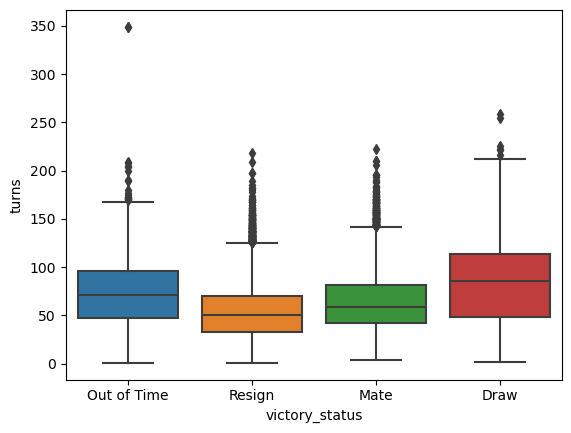

In [19]:
sns.boxplot(x='victory_status', y="turns", data=chess);

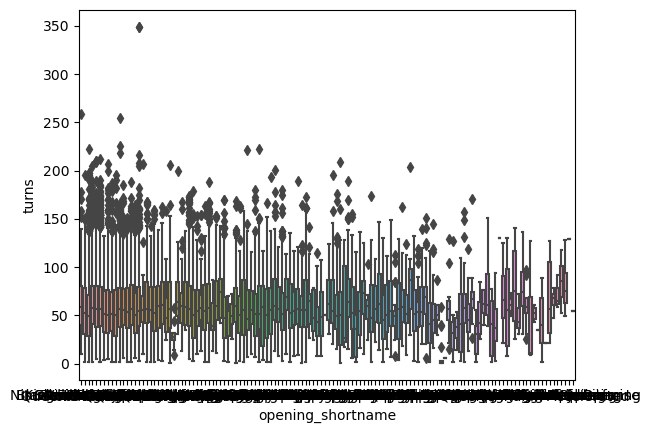

In [20]:
sns.boxplot(x='opening_shortname', y="turns", data=chess);

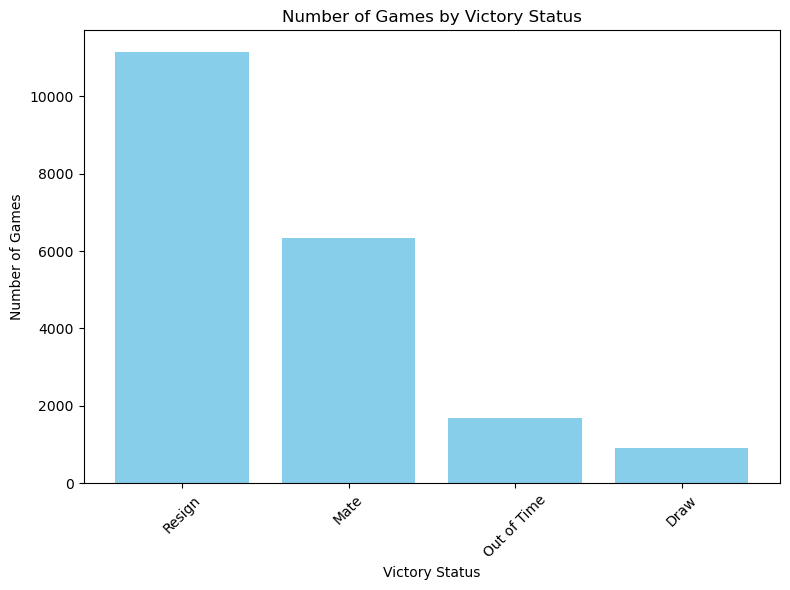

In [21]:
# Create a DataFrame with the counts of different victory statuses
victory_counts = chess['victory_status'].value_counts()

# Plotting the histogram
plt.figure(figsize=(8, 6))
plt.bar(victory_counts.index, victory_counts.values, color='skyblue')
plt.xlabel('Victory Status')
plt.ylabel('Number of Games')
plt.title('Number of Games by Victory Status')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

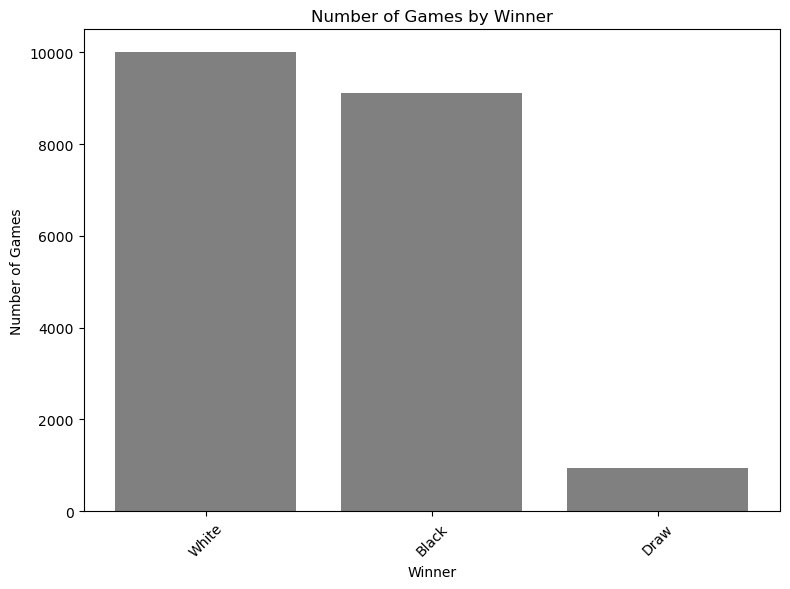

In [22]:
# Create a DataFrame with the counts of different victory statuses
victory_counts = chess['winner'].value_counts()

# Plotting the histogram
plt.figure(figsize=(8, 6))
plt.bar(victory_counts.index, victory_counts.values, color='grey')
plt.xlabel('Winner')
plt.ylabel('Number of Games')
plt.title('Number of Games by Winner')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

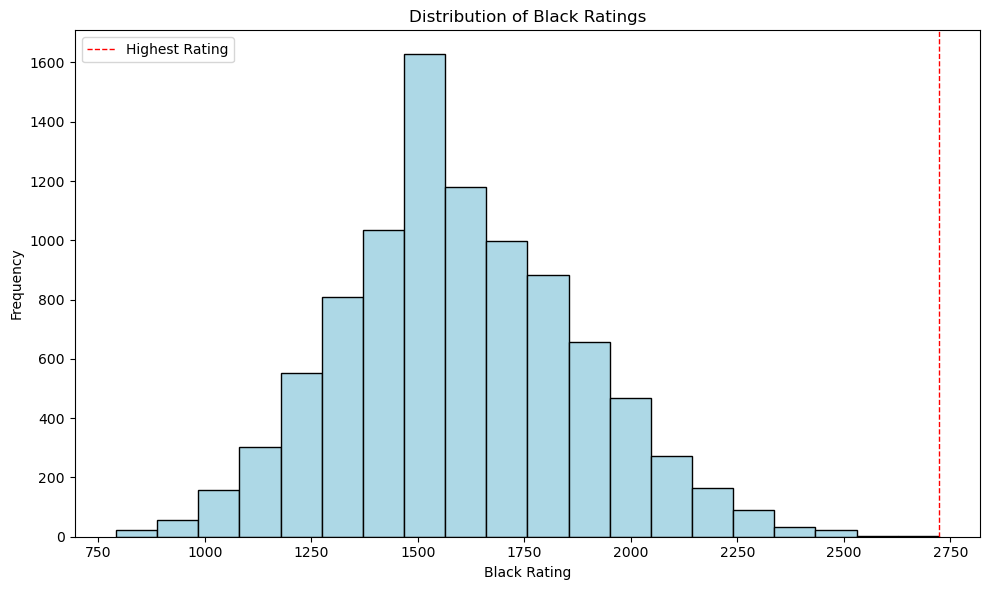

In [23]:
# Group by Black ID and get the maximum Black rating for each Black ID
max_black_ratings = chess.groupby('black_id')['black_rating'].max()

# Find the Black ID with the highest Black rating
highest_black_rating_id = max_black_ratings.idxmax()
highest_black_rating = max_black_ratings.max()

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(max_black_ratings, bins=20, color='lightblue', edgecolor='black')
plt.xlabel('Black Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Black Ratings')
plt.axvline(highest_black_rating, color='red', linestyle='dashed', linewidth=1, label='Highest Rating')
plt.legend()
plt.tight_layout()
plt.show()

In [24]:
# Find the black_id with the highest maximum black rating
highest_rated_player_id = max_black_ratings.idxmax()

# Get the maximum black rating for the highest-rated player
highest_max_black_rating = max_black_ratings.max()

print("Highest Rated Player ID:", highest_rated_player_id)
print("Highest Max Black Rating:", highest_max_black_rating)

Highest Rated Player ID: justicebot
Highest Max Black Rating: 2723


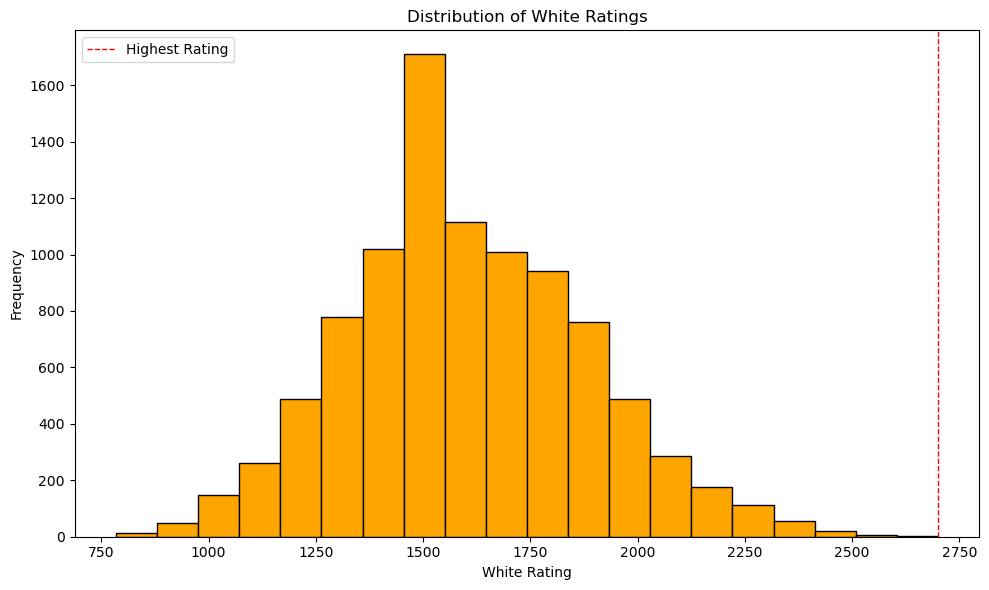

In [25]:
# Group by Black ID and get the maximum Black rating for each Black ID
max_white_ratings = chess.groupby('white_id')['white_rating'].max()

# Find the Black ID with the highest Black rating
highest_white_rating_id = max_white_ratings.idxmax()
highest_white_rating = max_white_ratings.max()

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(max_white_ratings, bins=20, color='orange', edgecolor='black')
plt.xlabel('White Rating')
plt.ylabel('Frequency')
plt.title('Distribution of White Ratings')
plt.axvline(highest_white_rating, color='red', linestyle='dashed', linewidth=1, label='Highest Rating')
plt.legend()
plt.tight_layout()

In [26]:
# Find the black_id with the highest maximum black rating
highest_rated_player_id = max_white_ratings.idxmax()

# Get the maximum black rating for the highest-rated player
highest_max_white_rating = max_white_ratings.max()

print("Highest Rated Player ID:", highest_rated_player_id)
print("Highest Max White Rating:", highest_max_white_rating)

Highest Rated Player ID: justicebot
Highest Max White Rating: 2700


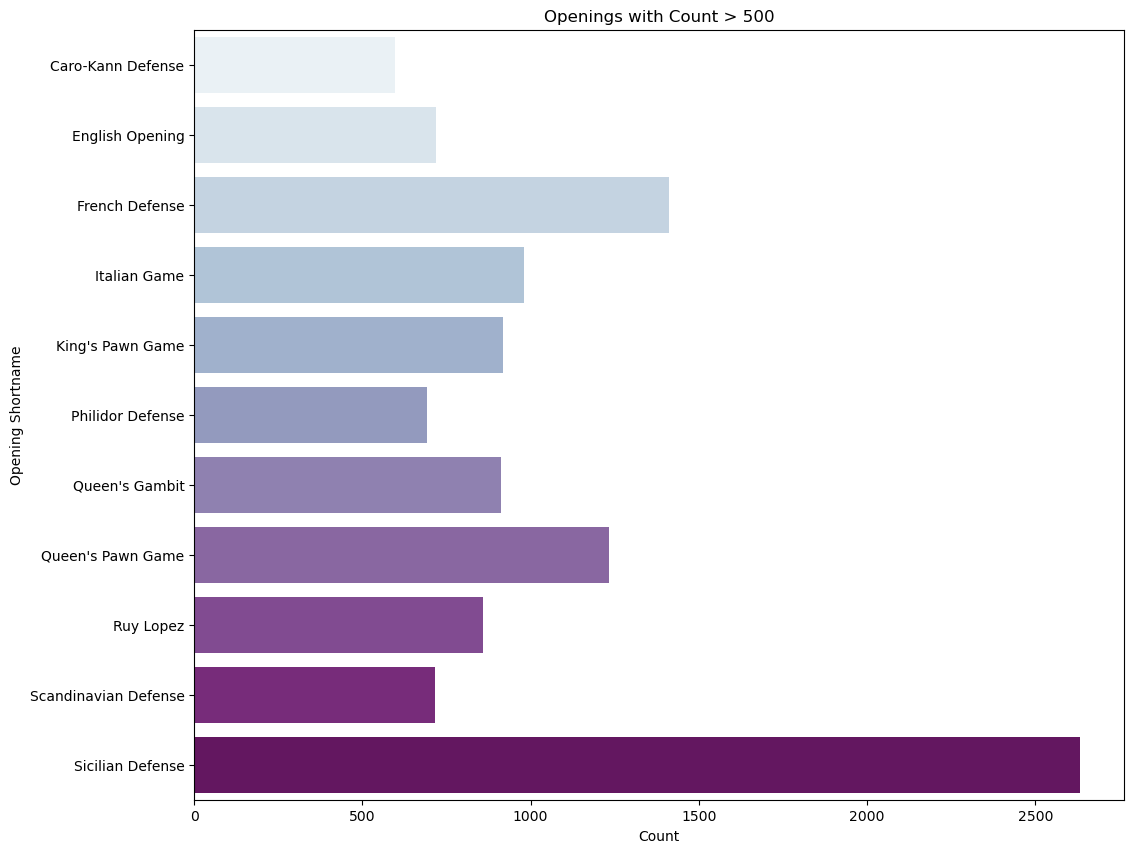

In [27]:
# Filter openings with count > 500
opening_500 = chess.groupby('opening_shortname').size().reset_index(name='count')
opening_500 = opening_500[opening_500['count'] > 500]

# Plot the bar chart
plt.figure(figsize=(12, 10))
sns.barplot(data=opening_500, y='opening_shortname', x='count', palette='BuPu')
plt.xlabel('Count')
plt.ylabel('Opening Shortname')
plt.title('Openings with Count > 500')
plt.show()

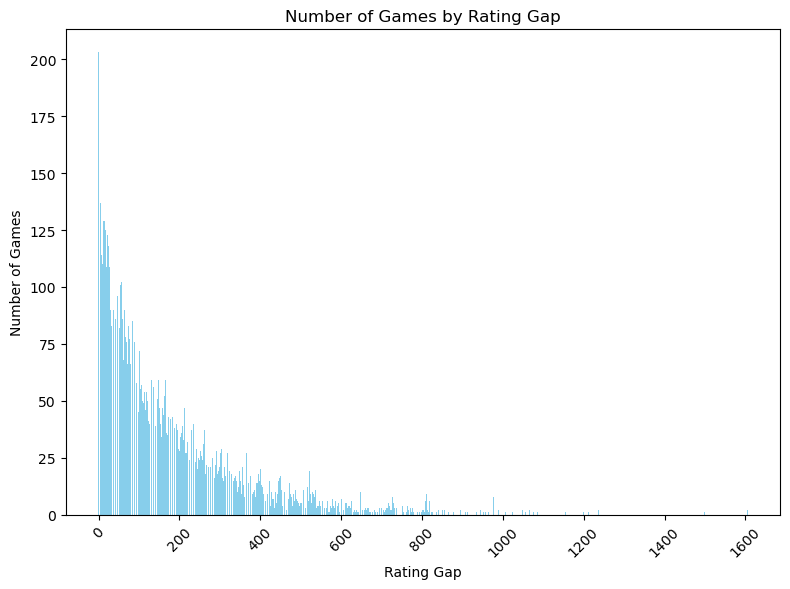

In [28]:
# Create a DataFrame with the counts of different victory statuses
victory_counts = chess['rating_gap'].value_counts()

# Plotting the histogram
plt.figure(figsize=(8, 6))
plt.bar(victory_counts.index, victory_counts.values, color='skyblue')
plt.xlabel('Rating Gap')
plt.ylabel('Number of Games')
plt.title('Number of Games by Rating Gap')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [29]:
opening_counts = chess['opening_shortname'].value_counts()
#plt.figure(figsize=(10, 6))
#opening_counts.plot(kind='bar')
#plt.title('Most Common Chess Openings')
#plt.xlabel('Opening Name')
#plt.ylabel('Count')
#plt.xticks(rotation=45, ha='right')
#plt.show()
opening_counts


opening_shortname
Sicilian Defense       2632
French Defense         1412
Queen's Pawn Game      1233
Italian Game            981
King's Pawn Game        917
                       ... 
Valencia Opening          1
Australian Defense        1
Doery Defense             1
Pterodactyl Defense       1
Global Opening            1
Name: count, Length: 128, dtype: int64

In [30]:
chess['opening_shortname'].describe()

count                20058
unique                 128
top       Sicilian Defense
freq                  2632
Name: opening_shortname, dtype: object

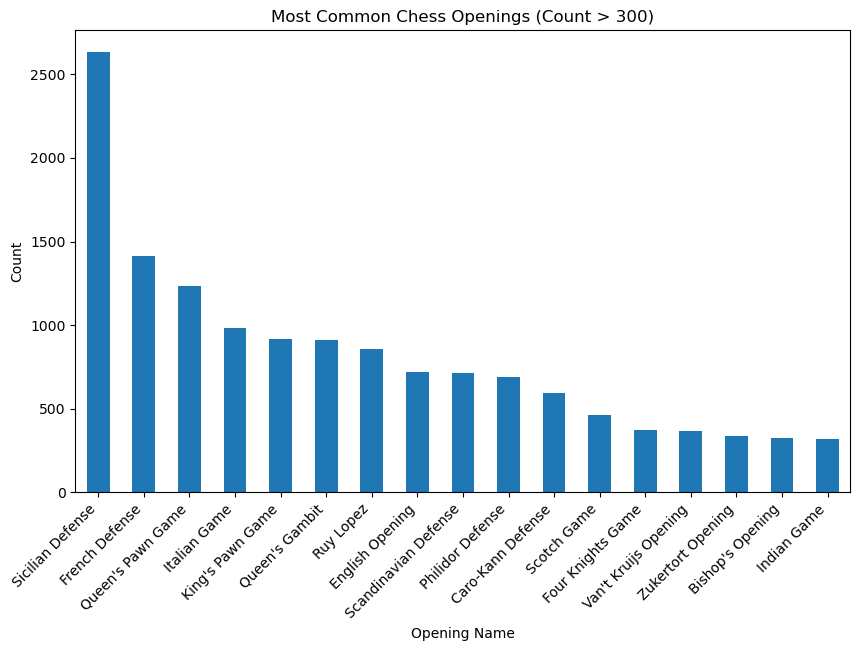

In [31]:
# Top openings = > opening_counts > 200
top_opening_counts = opening_counts[opening_counts > 300]
plt.figure(figsize=(10, 6))
top_opening_counts.plot(kind='bar')
plt.title('Most Common Chess Openings (Count > 300)')
plt.xlabel('Opening Name')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

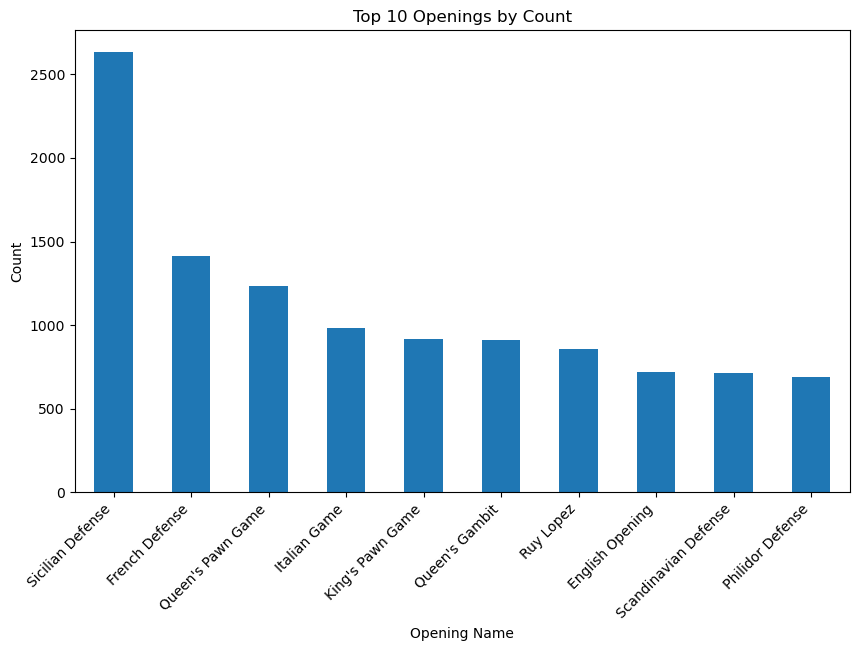

<Figure size 1000x600 with 0 Axes>

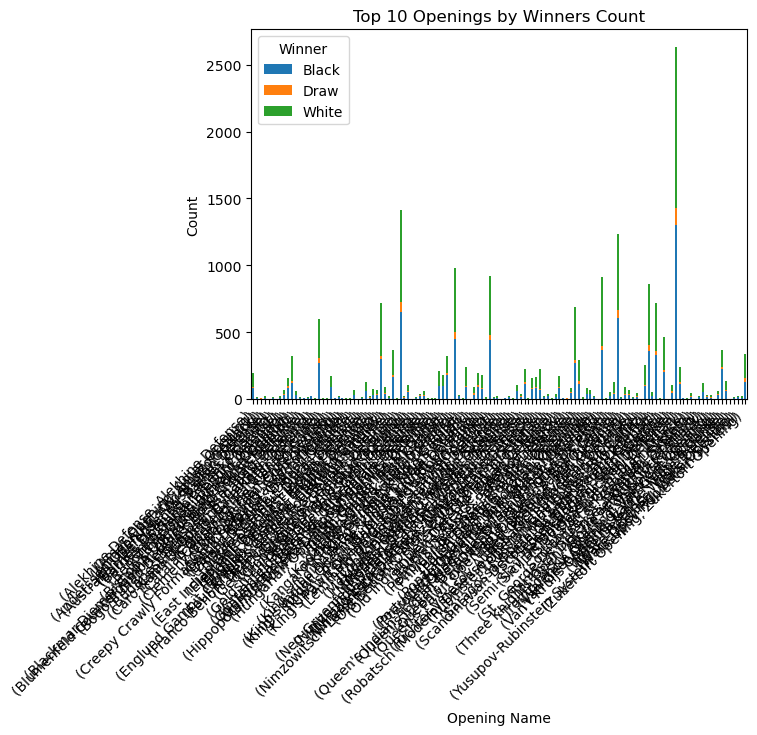

<Figure size 1000x600 with 0 Axes>

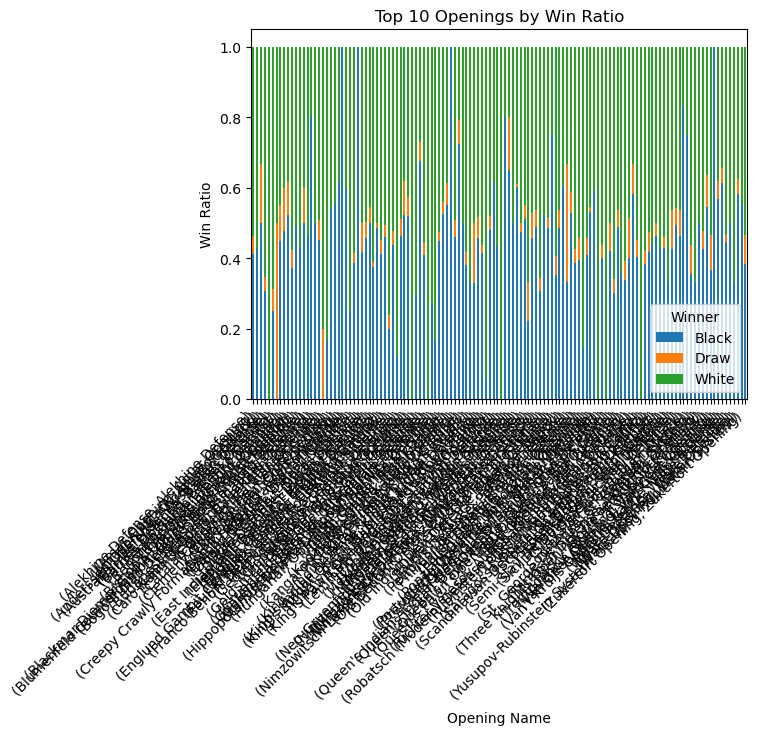

In [32]:
# Count the occurrences of each opening name
opening_counts = chess['opening_shortname'].value_counts()

# Get the top 10 openings by count
top_10_openings = opening_counts.head(10)

# Group by opening name and winner, and calculate the counts
opening_winner_counts = chess.groupby('opening_shortname')['winner'].value_counts()

# Calculate the total counts for each opening
opening_counts = chess['opening_shortname'].value_counts()

# Calculate the win ratio for each opening
win_ratios = opening_winner_counts / opening_counts

# Get the top 10 openings by winners count
top_10_winner_counts = opening_winner_counts.groupby(level=0).nlargest(10)

# Get the top 10 openings by win ratio
top_10_win_ratios = win_ratios.groupby(level=0).nlargest(10)

# Plot the bar chart of top 10 openings by count
plt.figure(figsize=(10, 6))
top_10_openings.plot(kind='bar')
plt.title('Top 10 Openings by Count')
plt.xlabel('Opening Name')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

# Plot the bar chart of top 10 openings by winners count
plt.figure(figsize=(10, 6))
top_10_winner_counts.unstack().plot(kind='bar', stacked=True)
plt.title('Top 10 Openings by Winners Count')
plt.xlabel('Opening Name')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Winner')
plt.show()

# Plot the bar chart of top 10 openings by win ratio
plt.figure(figsize=(10, 6))
top_10_win_ratios.unstack().plot(kind='bar', stacked=True)
plt.title('Top 10 Openings by Win Ratio')
plt.xlabel('Opening Name')
plt.ylabel('Win Ratio')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Winner')
plt.show()

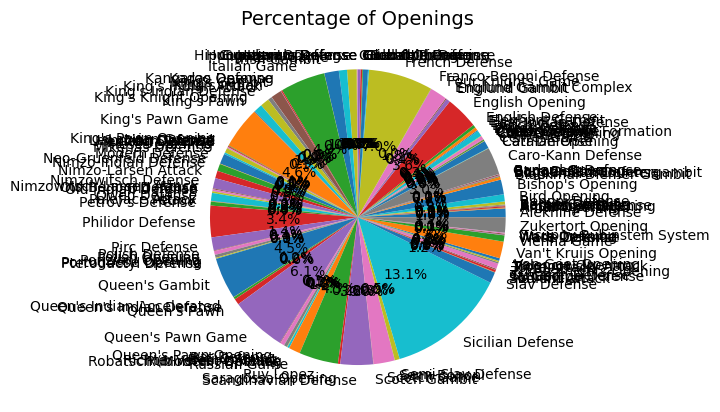

<Figure size 640x480 with 0 Axes>

In [33]:
opening_data = chess.groupby('opening_shortname')['game_id'].count()
plt.pie(x=opening_data, autopct='%.1f%%', labels=opening_data.keys(), pctdistance=0.5)
plt.title('Percentage of Openings', fontsize=14)
plt.show()
plt.clf()

<Figure size 1000x600 with 0 Axes>

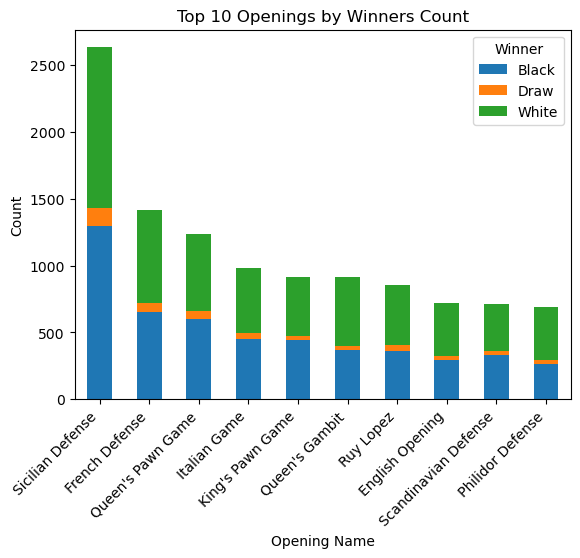

<Figure size 1000x600 with 0 Axes>

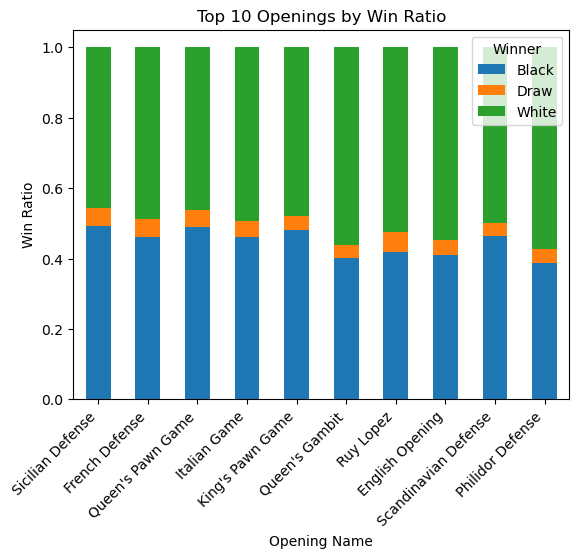

In [34]:
# Count the occurrences of each opening name
opening_counts = chess['opening_shortname'].value_counts()

# Get the top 10 openings by count
top_10_openings = opening_counts.head(10)

# Filter the opening_winner_counts to include only top 10 openings
top_10_winner_counts_filtered = opening_winner_counts.loc[top_10_openings.index]

# Filter the win_ratios to include only top 10 openings
top_10_win_ratios_filtered = win_ratios.loc[top_10_openings.index]

# Plot the bar chart of top 10 openings by winners count
plt.figure(figsize=(10, 6))
top_10_winner_counts_filtered.unstack().plot(kind='bar', stacked=True)
plt.title('Top 10 Openings by Winners Count')
plt.xlabel('Opening Name')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Winner')
plt.show()

# Plot the bar chart of top 10 openings by win ratio
plt.figure(figsize=(10, 6))
top_10_win_ratios_filtered.unstack().plot(kind='bar', stacked=True)
plt.title('Top 10 Openings by Win Ratio')
plt.xlabel('Opening Name')
plt.ylabel('Win Ratio')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Winner')
plt.show()

In [35]:
# Convert top 10 winner counts to a DataFrame
top_10_winner_counts_table = top_10_winner_counts.unstack().fillna(0).astype(int)
top_10_winner_counts_table.columns.name = 'Winner'
top_10_winner_counts_table.index.name = 'Opening Name'
print("Top 10 Openings by Winners Count:")
print(top_10_winner_counts_table)

# Convert top 10 win ratios to a DataFrame
top_10_win_ratios_table = top_10_win_ratios.unstack().fillna(0).round(2)
top_10_win_ratios_table.columns.name = 'Winner'
top_10_win_ratios_table.index.name = 'Opening Name'
print("\nTop 10 Openings by Win Ratio:")
print(top_10_win_ratios_table)

Top 10 Openings by Winners Count:
Winner                                               Black  Draw  White
opening_shortname         opening_shortname                            
Alekhine Defense          Alekhine Defense              79    10    103
Amar Opening              Amar Opening                   6     0      8
Amazon Attack             Amazon Attack                  3     1      2
Anderssen Opening         Anderssen Opening              8     1     17
Australian Defense        Australian Defense             0     0      1
...                                                    ...   ...    ...
Wade Defense              Wade Defense                   1     0      1
Ware Defense              Ware Defense                   4     0      8
Ware Opening              Ware Opening                  14     1      9
Yusupov-Rubinstein System Yusupov-Rubinstein System     11     0      9
Zukertort Opening         Zukertort Opening            129    28    179

[128 rows x 3 columns]

Top 1

In [36]:
# Sort the top 10 winner counts by the total count of winners
top_10_winner_counts_sorted = top_10_winner_counts.groupby(level=0).sum().sort_values(ascending=False).index

# Sort the top 10 win ratios by the win ratio
top_10_win_ratios_sorted = top_10_win_ratios.groupby(level=0).mean().sort_values(ascending=False).index

# Reorder the top 10 winner counts and win ratios using the sorted index
top_10_winner_counts_reordered = top_10_winner_counts.reindex(top_10_winner_counts_sorted, level=0)
top_10_win_ratios_reordered = top_10_win_ratios.reindex(top_10_win_ratios_sorted, level=0)

# Convert top 10 winner counts to a DataFrame
top_10_winner_counts_table = top_10_winner_counts_reordered.unstack().fillna(0).astype(int)
top_10_winner_counts_table.columns.name = 'Winner'
top_10_winner_counts_table.index.name = 'Opening Name'
print("Top 10 Openings by Winners Count:")
print(top_10_winner_counts_table)

# Convert top 10 win ratios to a DataFrame
top_10_win_ratios_table = top_10_win_ratios_reordered.unstack().fillna(0).round(2)
top_10_win_ratios_table.columns.name = 'Winner'
top_10_win_ratios_table.index.name = 'Opening Name'
print("\nTop 10 Openings by Win Ratio:")
print(top_10_win_ratios_table)

Top 10 Openings by Winners Count:
Winner                                   Black  Draw  White
opening_shortname   opening_shortname                      
Sicilian Defense    Sicilian Defense      1299   130   1203
French Defense      French Defense         653    70    689
Queen's Pawn Game   Queen's Pawn Game      602    61    570
Italian Game        Italian Game           451    47    483
King's Pawn Game    King's Pawn Game       441    36    440
...                                        ...   ...    ...
Australian Defense  Australian Defense       0     0      1
Pterodactyl Defense Pterodactyl Defense      0     0      1
Valencia Opening    Valencia Opening         1     0      0
Doery Defense       Doery Defense            1     0      0
Global Opening      Global Opening           0     0      1

[128 rows x 3 columns]

Top 10 Openings by Win Ratio:
Winner                                   Black  Draw  White
opening_shortname   opening_shortname                      
Lemming Def

In [37]:
# Sort the top 10 winner counts by the total count of winners
top_10_winner_counts_sorted = top_10_winner_counts.groupby(level=0).sum().sort_values(ascending=False).head(10).index

# Sort the top 10 win ratios by the win ratio
top_10_win_ratios_sorted = top_10_win_ratios.groupby(level=0).mean().sort_values(ascending=False).head(10).index

# Reorder the top 10 winner counts and win ratios using the sorted index
top_10_winner_counts_reordered = top_10_winner_counts.reindex(top_10_winner_counts_sorted, level=0)
top_10_win_ratios_reordered = top_10_win_ratios.reindex(top_10_win_ratios_sorted, level=0)

# Convert top 10 winner counts to a DataFrame
top_10_winner_counts_table = top_10_winner_counts_reordered.unstack().fillna(0).astype(int)
top_10_winner_counts_table.columns.name = 'Winner'
top_10_winner_counts_table.index.name = 'Opening Name'
print("Top 10 Openings by Winners Count:")
print(top_10_winner_counts_table)

# Convert top 10 win ratios to a DataFrame
top_10_win_ratios_table = top_10_win_ratios_reordered.unstack().fillna(0).round(2)
top_10_win_ratios_table.columns.name = 'Winner'
top_10_win_ratios_table.index.name = 'Opening Name'
print("\nTop 10 Openings by Win Ratio:")
print(top_10_win_ratios_table)

Top 10 Openings by Winners Count:
Winner                                     Black  Draw  White
opening_shortname    opening_shortname                       
Sicilian Defense     Sicilian Defense       1299   130   1203
French Defense       French Defense          653    70    689
Queen's Pawn Game    Queen's Pawn Game       602    61    570
Italian Game         Italian Game            451    47    483
King's Pawn Game     King's Pawn Game        441    36    440
Queen's Gambit       Queen's Gambit          365    35    512
Ruy Lopez            Ruy Lopez               358    49    451
English Opening      English Opening         296    29    395
Scandinavian Defense Scandinavian Defense    332    26    358
Philidor Defense     Philidor Defense        267    28    396

Top 10 Openings by Win Ratio:
Winner                                                 White  Black
opening_shortname          opening_shortname                       
Lemming Defense            Lemming Defense             

In [38]:
# Print the top ten openings_shortname in terms of win ratio
print("Top 10 Openings by Win Ratio:")
print(top_10_win_ratios_sorted)
# Convert the index of top_10_win_ratios_sorted to a DataFrame
top_10_openings_by_win_ratio = pd.DataFrame(top_10_win_ratios_sorted, columns=['Win Ratio'])
top_10_openings_by_win_ratio.index.name = 'Opening Name'
print("Top 10 Openings by Win Ratio:")
print(top_10_openings_by_win_ratio)

Top 10 Openings by Win Ratio:
Index(['Lemming Defense', 'Pterodactyl Defense', 'Rubinstein Opening',
       'Valencia Opening', 'Crab Opening', 'Guatemala Defense',
       'Queen's Indian Accelerated', 'Irish Gambit', 'Doery Defense',
       'Global Opening'],
      dtype='object', name='opening_shortname')
Top 10 Openings by Win Ratio:
Empty DataFrame
Columns: [Win Ratio]
Index: []


In [39]:
#Did white win?
chess['white_victory'] = np.where(chess['winner'] == 'White', 1, 0)
chess['white_victory']

0        1
1        0
2        1
3        1
4        1
        ..
20053    1
20054    0
20055    1
20056    1
20057    0
Name: white_victory, Length: 20058, dtype: int64

Text(0.5, 1.0, 'Winning Percentage for Games Under 1593 ELO')

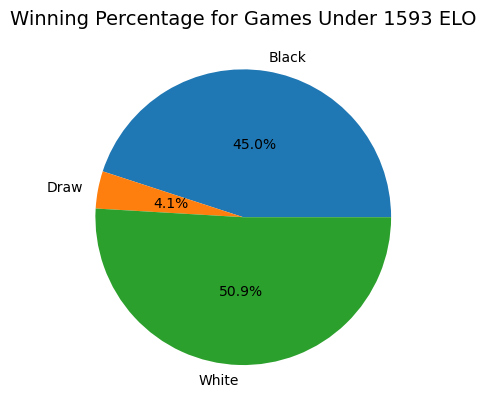

In [40]:
num = 1593
chess_under_1593 = chess[(chess.white_rating < num) & (chess.black_rating < num)]

chess_under_1593_winners = chess_under_1593.groupby('winner')['game_id'].count()
chess_under_1593_winners

plt.pie(x=chess_under_1593_winners, autopct="%.1f%%", labels=chess_under_1593_winners.keys(), pctdistance=0.5)
plt.title("Winning Percentage for Games Under {} ELO".format(num), fontsize=14)

Text(0.5, 1.0, 'Winning Percentage for Games Above 1593 ELO')

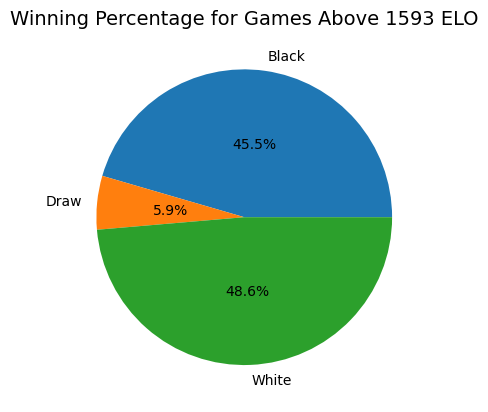

In [46]:
num = 1593
chess_above_1593 = chess[(chess.white_rating > num) & (chess.black_rating > num)]

chess_above_1593_winners = chess_above_1593.groupby('winner')['game_id'].count()
chess_above_1593_winners

plt.pie(x=chess_above_1593_winners, autopct="%.1f%%", labels=chess_above_1593_winners.keys(), pctdistance=0.5)
plt.title("Winning Percentage for Games Above {} ELO".format(num), fontsize=14)

Text(0.5, 1.0, 'Winning Percentage for Games Above 2000 ELO')

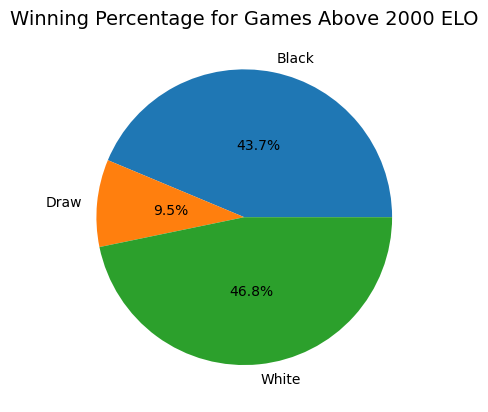

In [47]:
num1 = 2000
chess_above_2000 = chess[(chess.white_rating > num1) & (chess.black_rating > num1)]

chess_above_2000_winners = chess_above_2000.groupby('winner')['game_id'].count()
chess_above_2000_winners

plt.pie(x=chess_above_2000_winners, autopct="%.1f%%", labels=chess_above_2000_winners.keys(), pctdistance=0.5)
plt.title("Winning Percentage for Games Above {} ELO".format(num1), fontsize=14)

Text(0.5, 1.0, 'Winning Percentage for Games Above 2100 ELO')

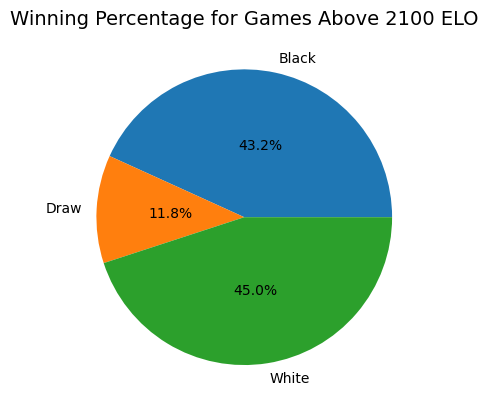

In [51]:
num2 = 2100
chess_above_2100 = chess[(chess.white_rating > num2) & (chess.black_rating > num2)]

chess_above_2100_winners = chess_above_2100.groupby('winner')['game_id'].count()
chess_above_2100_winners

plt.pie(x=chess_above_2100_winners, autopct="%.1f%%", labels=chess_above_2100_winners.keys(), pctdistance=0.5)
plt.title("Winning Percentage for Games Above 2100 ELO".format(num), fontsize=14)

Text(0.5, 1.0, 'Winning Percentage for Games Above 2250 ELO')

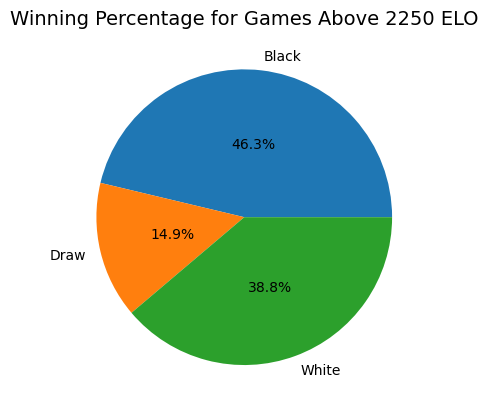

In [53]:
num3 = 2250
chess_above_2250 = chess[(chess.white_rating > num3) & (chess.black_rating > num3)]

chess_above_2250_winners = chess_above_2250.groupby('winner')['game_id'].count()
chess_above_2250_winners

plt.pie(x=chess_above_2250_winners, autopct="%.1f%%", labels=chess_under_1593_winners.keys(), pctdistance=0.5)
plt.title("Winning Percentage for Games Above {} ELO".format(num3), fontsize=14)

In [45]:
num = 2250
chess_above_2150 = chess[(chess.white_rating > num) & (chess.black_rating > num)]

chess_above_2150_winners = chess_above_2150.groupby('winner')['game_id'].count()
chess_above_2150_winners

winner
Black    31
Draw     10
White    26
Name: game_id, dtype: int64